<a href="https://colab.research.google.com/github/Veena7580/Homework/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HDS5210-2024 Final Project

# Project Description

This large scale data analysis research effort aims at exploring global descriptors of infectious disease mortalities using state of the art analytical and data mining techniques. The work combines several data sets of mortality rates and certain HIV-TB related data, as well as demographical data to provide the comprehensive picture of disease distribution through different regions and time periods. Such integration of data sources allows the project to widen the understanding of how some given infectious diseases are related to and affect different populations.

The initial and principal analytical approach of the project consists of a number of methods and algorithms of statistical analysis and machine learning to find the patterns in mortality of diseases. Using temporal analysis, the project explores shifts in disease mortality levels over time, while cross-sectional methods focus on geographical differences in health results. The analysis using population data takes the work further by addressing how different populations are affected by diseases in different ways. Diagnoses are also accompanied by advanced data analysis techniques that help to simplify schedules to act like diagrams.

The machine learning part of the work is a comparison of the Linear Regression, Ridge Regression, and Random Forest algorithms with respect to disease mortality. This comparative modeling provides not only the understanding of the kind of statistical relationships between different diseases but also which factors are most influential to mortality rates. Information about the predictability of disease patterns and the reliability of different analytical approaches are contained in the performance measures of the models.

It provides a key resource for current and future health care, clinical and policy practitioners, administrators and researchers interested in the subject of public health as a project. Given its results, it can provide valuable funding investment information, assess populations and geographic locations that may pose high risk, and enable the design of healthcare interventions that may be most applicable. The approaches derived from this project can be used for continuous tracking of disease rates and assessing the impact of healthcare interventions; it can therefore serve as important work for evidence-based health care system planning.

# Dataset 1 - Annual Number of Deaths by Cause

This is a mortality record database that provides information on causes of death in different countries and in the course of the years. This dataset contains 7273 observations and 36 variables. It encompasses all cause of mortality ranging from infectious diseases such as HIV/AIDS, Tuberculosis, Malaria, chronic diseases such as Alzheimer’s disease, Parkinson’s disease, Cardiovascular diseases and external factors such as road traffic injuries, interpersonal violence and suicide. The data is formatted with such important identifying fields as ‘Entity’ (presumably countries or regions), ‘Code’ (codes of the corresponding countries/regions), and ‘Year’. All death-related columns are specifically labeled with the format "Deaths - [Cause] - Sex: All – Sexes: Both – Age: All Ages (Number), which means that the figures are of total deaths of both sexes and of all ages. Out of 54 death-related columns, 32 are saved as float, which means it may contain decimal points or has been normalized for statistical purposes.

Data Sources - https://www.kaggle.com/datasets/programmerrdai/hiv-aids/data?select=annual-number-of-deaths-by-cause.csv

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df_mortality = pd.read_csv("/content/annual-number-of-deaths-by-cause.csv")

In [42]:
df_mortality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 36 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Entity                                                                                    7273 non-null   object 
 1   Code                                                                                      6206 non-null   object 
 2   Year                                                                                      7273 non-null   int64  
 3   Number of executions (Amnesty International)                                              267 non-null    object 
 4   Deaths - Meningitis - Sex: Both - Age: All Ages (Number)                                  6840 non-null   float64
 5   Deaths - Alzheimer's disease and other dementias - Sex:

# Dataset 2 - TB Related Deaths HIV

This is a more refined dataset particularly one that is concerned with deaths due to tuberculosis among HIV positive patients. It has 3,778 entries and 4 fields. The structure is the same as in the first dataset with a ‘Entity’ and ‘Code’ fields for geographical identification and a ‘Year’ field for temporal tracking. The last column is the key metric column that is “Estimated TB-related deaths among people living with HIV - estimate” and this is of float data type. This dataset seems to be tailored to monitor the unique incidence of HIV and tuberculosis mortality, giving a closer view of this particular health issue. The use of the term ‘estimated’ implies that the figure is based on sampling and extrapolation rather than headcount.

Data Sources - https://www.kaggle.com/datasets/programmerrdai/hiv-aids/data?select=tb-related-deaths-hiv.csv

In [43]:
df_hiv_tb = pd.read_excel("/content/tb-related-deaths-hiv.xlsx")
df_hiv_tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 4 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Entity                                                               3778 non-null   object 
 1   Code                                                                 3625 non-null   object 
 2   Year                                                                 3778 non-null   int64  
 3   Estimated TB-related deaths among people living with HIV - estimate  3778 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 118.2+ KB


# Creating Additional Demographic Dataset

The second dataset, df_population, is a synthetic dataset generated for this analysis to provide supplementary population data. This DataFrame is built by using the unique country/region names in the mortality dataset and attributing demographic parameters to each name randomly.
The DataFrame has three columns:

'Entity': Includes country and region codes from the mortality dataset that are not found in the population dataset
'Population_Category': randomly distributes each entity to one of the three groups: ‘High’, ‘Medium’, or ‘Low’ – could be population density or size.
'Region': Distributes each entity into one of five broad geographical areas of the world (Africa, Asia, Europe, Americas, Oceania).

Examining the head() output below, we see this random assignment at work: For instance, Afghanistan has a “Low” population level and is placed in “Africa” but these placements are arbitrary and do not represent geographical or real life population density. This data is generated solely for the purpose of teaching data analysis and should not be used for actual demographic studies. In the real world, people prefer to use real demographic data obtained from trustworthy sources instead of mere assignments.

In [44]:
# Create additional demographic dataset for demonstration
df_population = pd.DataFrame({
    'Entity': df_mortality['Entity'].unique(),
    'Population_Category': np.random.choice(['High', 'Medium', 'Low'], size=len(df_mortality['Entity'].unique())),
    'Region': np.random.choice(['Africa', 'Asia', 'Europe', 'Americas', 'Oceania'], size=len(df_mortality['Entity'].unique()))
})

df_population.head()

,Entity,Population_Category,Region
0,Afghanistan,Medium,Asia
1,African Region (WHO),Medium,Americas
2,Albania,Low,Oceania
3,Algeria,Low,Americas
4,American Samoa,High,Europe


# Transformation - Cleaning the Column Names

The code also does some cleaning of the column names on the mortality dataset to make their names more readable and more meaningful. This transformation is used to replace the repetitive prefixes and suffixes in the column names by using the replace() method.

Before the transformation, each death-related column had a verbose format: “Cause of Death - Sex - Both - All Ages = Number”. The code removes two specific patterns:
1. Replace the word “Deaths - ” at the start of the column names
2. Removes " - Sex: Age: All Ages (Number) at the end of the column names of both.

Looking at the resulting column names, we can see:
- Basic identifying columns: 'Entity', 'Code', 'Year'
- Various disease columns: Meningitis, malaria, HIV/AIDS and so on.
- External cause columns: ‘Road injuries’, ‘suicide’, ‘drowning’, etc.
- Chronic disease columns: High blood pressure, high cholesterol, ‘cardiovascular diseases’, ‘diabetes mellitus’ and so on.

This cleaning step removes unnecessary characters from the column names but keeps the main information about each mortality cause intact so that it will be convenient to work with in the subsequent analysis.


In [45]:
#Clean column names
df_mortality.columns = [col.replace('Deaths - ', '').replace(' - Sex: Both - Age: All Ages (Number)', '')
                      for col in df_mortality.columns]

df_mortality.columns

Index(['Entity', 'Code', 'Year',
       'Number of executions (Amnesty International)', 'Meningitis',
       'Alzheimer's disease and other dementias', 'Parkinson's disease',
       'Nutritional deficiencies', 'Malaria', 'Drowning',
       'Interpersonal violence', 'Maternal disorders', 'HIV/AIDS',
       'Drug use disorders', 'Tuberculosis', 'Cardiovascular diseases',
       'Lower respiratory infections', 'Neonatal disorders',
       'Alcohol use disorders', 'Self-harm', 'Exposure to forces of nature',
       'Diarrheal diseases', 'Environmental heat and cold exposure',
       'Neoplasms', 'Conflict and terrorism', 'Diabetes mellitus',
       'Chronic kidney disease', 'Poisonings', 'Protein-energy malnutrition',
       'Terrorism (deaths)', 'Road injuries', 'Chronic respiratory diseases',
       'Cirrhosis and other chronic liver diseases', 'Digestive diseases',
       'Fire, heat, and hot substances', 'Acute hepatitis'],
      dtype='object')

# Transformation - Create Mortalty Rate Column

This code brings about one of the most important transformations of the data in order to compute the overall mortality indices considering all the causes of death included in the dataset. It starts with a list of death-related columns, excluding non-death columns which should not contribute to the total death count during the data collection process; ‘Entity’, ‘Code’, ‘Year’, and ‘Number of executions’.

A new column called Total_Deaths is then derived by taking the row sum of all the death columns that were described above. The conversion by .astype(float) is crucial for correct numerical treatment, by coéseing any string or object types to float type. The axis=1 parameter in the sum() function tells that sum should be taken across columns that is horizontally not vertically.

The following screenshot illustrates the first five values of the newly invented ‘Total_Deaths’ field, 204797, 200209, 195927, 196559 , and 200363 for the initial five entities in the provided data set. Such numbers display an overall mortality rate, or how many people have died, due to any type of cause, including sicknesses, injuries, or other factors for each organization.

In [46]:
#Create mortality rate column
death_columns = [col for col in df_mortality.columns
                if col not in ['Entity', 'Code', 'Year', 'Number of executions (Amnesty International)']]
df_mortality['Total_Deaths'] = df_mortality[death_columns].astype(float).sum(axis=1)

df_mortality['Total_Deaths'].head()

,Total_Deaths
0,204797.0
1,200209.0
2,195927.0
3,196559.0
4,200363.0


# Merging Data - mortality data with HIV-TB data

By using this code, one of the data integration steps is shown as two related data frames are merged by the pd.merge() function. Using Entity and Year as join indexes, the merge operation merges the primary mortality dataset (df_mortality) into specific HIV-TB death estimates of the second dataset (df_hiv_tb). The ‘Left’ merge type make certain that all records from the mortality dataset are maintained even if matching HIV-TB data is not found.

The final merged DataFrame (merged_df) consists of all the columns from the mortality dataset followed by the added column; ‘Estimated TB-related deaths among people living with HIV - estimate’ that was in the HIV-TB dataset. In head() output, we observe the data set for Afghanistan for some years (2007-2012), causing mortality by certain causes and HIV-TB mortality estimates. For instance, Afghanistan had got around 204,797 total mortality in 2007 and about sixty Tuberculosis associated mortality among HIV +ve patients.

The final merged dataset is advantageous in that it supplies general mortality trends analysis as well as comparative analysis between HIV-TB deaths and other general mortality causes. The rising estimates of HIV-TB mortality in Afghanistan (from 60 in 2007 to 97.8 in 2012) in tandem with overall HIV and TB deaths indicate transition in the disease dynamics or Reporting and diagnostic processes.



In [47]:
#Merge mortality data with HIV-TB data
merged_df = pd.merge(
    df_mortality,
    df_hiv_tb[['Entity', 'Year', 'Estimated TB-related deaths among people living with HIV - estimate']],
    on=['Entity', 'Year'],
    how='left'
)

merged_df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Protein-energy malnutrition,Terrorism (deaths),Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total_Deaths,Estimated TB-related deaths among people living with HIV - estimate
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204797.0,60.0473
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0,66.4017
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0,76.5272
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0,89.6658
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200363.0,97.8129


# Merging Data - Adding the Demographic Information

This code shows an additional data integration process, specifically the second one where demographic details are appended to the dataset which we obtained from the first step of merging data. by applying pd.merge() function, it merges our previous merged data frame with mortality and HIV-TB data with the demography data frame (df_population) that has been named as ‘demographics’ here using ‘Entity’ as the key. The ‘left’ merge type makes certain that we keep all the mortality records without losing any while incorporating demographic data where there is.

The resulting DataFrame now includes two new columns: To do, an interaction is made between two variables namely ‘Population_Category’ and ‘Region’. On head() analysis of data for Afghanistan for the period 2007-2012, population category is ‘Low’; and region assigned is ‘Africa’, They are synthetic demographics though. Every row preserves all the prior mortality data and in addition they contain these demographic classifications.

This improved dataset then permits more precise analyses, including changes in mortality between different population groups or cross-regional disease distribution. In these years, Afghanistan’s demography has been classified in a similar manner, but deaths and HIV-TB death estimate has differed.

In [48]:
#Add demographic information
merged_df = pd.merge(
    merged_df,
    df_population,
    on='Entity',
    how='left'
)

merged_df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Road injuries,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,"Fire, heat, and hot substances",Acute hepatitis,Total_Deaths,Estimated TB-related deaths among people living with HIV - estimate,Population_Category,Region
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,7425.0,7222.0,3346.0,6458.0,481.0,3437.0,204797.0,60.0473,Medium,Asia
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,7355.0,7143.0,3316.0,6408.0,462.0,3005.0,200209.0,66.4017,Medium,Asia
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,7290.0,7045.0,3291.0,6358.0,448.0,2663.0,195927.0,76.5272,Medium,Asia
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,7432.0,6916.0,3318.0,6370.0,448.0,2365.0,196559.0,89.6658,Medium,Asia
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,7494.0,6878.0,3353.0,6398.0,445.0,2264.0,200363.0,97.8129,Medium,Asia


# Transformation - Creating Time Periods

This code is Temporal Categorization transformation where a new column ‘Time_Period’ with meaningful decade has been created for the years. The pd.cut() function is used to bin the 'Year' column into three distinct periods: The shows are divided into five decades, namely s, including ‘1990s’ (1989-2000), the ‘2000s’ (2000-2010), and the ‘2010s’ (2010-2020). This binning is useful when analysing data over larger periods than just years.

Looking at the head() output for the 'Time_Period' column, we can see how the first five records are categorized: we see that the first three entries belong to ‘2000s’ and the last two to ‘2010s’. This is consistent with what we saw in the data earlier where these records were representing Afghanistan data from 2007 to 2012 which is rightfully divided between two different decades.

This form of categorisation is important in an analysis of long run view, comparisons of mortality across different decades and understanding the development of health outcomes over time. These time periods are not cumbersome like ‘nineties, ‘aughts, and teens but instead are formatted conveniently for construction of temporal differences and graphs.

In [49]:
#Create time periods
merged_df['Time_Period'] = pd.cut(merged_df['Year'],
                                bins=[1989, 2000, 2010, 2020],
                                labels=['1990s', '2000s', '2010s'])

merged_df['Time_Period'].head()

,Time_Period
0,2000s
1,2000s
2,2000s
3,2010s
4,2010s


# Transofrmation Creating Death Ratios and Creating Composite Disease Index

The following code does two things to the disease data in order to construct comparable statistics The first is that it computes two important transformations over the disease data that makes the rate that it is reporting meaningful. In the first change, the code picks four certain sicknesses including HIV/AIDS, tuberculosis, malaria, and lower respiratory tract infections to analyze. For each of these diseases it computes a death ratio by dividing the number of deaths that were attributed to each specific disease by the total deaths and added new columns with the suffix’s _ratio’ to the dataframe. This ratio facilitates analyses of the distribution of the burden of each disease in regards to the overall mortality trend.

In the second transformation, the code forms ‘Disease_Burden_Index’ which is equal to the average of number of death of the four selected diseases. Looking at the head() output of this index, we can see the values decreasing over time for the first five records: from 8302.00 to 6642.25. Such averaging comes in handy in giving out a single number through which the overall impact of these infectious diseases can be measured.

Smaller value of the Disease_Burden_Index implies that the situation with these specific infectious diseases may have even improved over time for the given entity, at least in terms of the first five records. This broad index is helpful in comparing on the whole prevalence of infections diseases in different areas, during different periods and among different population groups, as it simplifies the relative evaluation of various data due to reducing them to a single figure.

In [50]:
# Select specific diseases for analysis
diseases = ['HIV/AIDS', 'Tuberculosis', 'Malaria', 'Lower respiratory infections']

#Calculate death ratios
for disease in diseases:
    merged_df[f'{disease}_ratio'] = merged_df[disease].astype(float) / merged_df['Total_Deaths']


merged_df.head()

,Entity,Code,Year,Number of executions (Amnesty International),Meningitis,Alzheimer's disease and other dementias,Parkinson's disease,Nutritional deficiencies,Malaria,Drowning,...,Acute hepatitis,Total_Deaths,Estimated TB-related deaths among people living with HIV - estimate,Population_Category,Region,Time_Period,HIV/AIDS_ratio,Tuberculosis_ratio,Malaria_ratio,Lower respiratory infections_ratio
0,Afghanistan,AFG,2007,15,2933.0,1402.0,450.0,2488.0,393.0,2127.0,...,3437.0,204797.0,60.0473,Medium,Asia,2000s,0.000723,0.024390,0.001919,0.135119
1,Afghanistan,AFG,2008,17,2731.0,1424.0,455.0,2277.0,255.0,1973.0,...,3005.0,200209.0,66.4017,Medium,Asia,2000s,0.000784,0.023925,0.001274,0.128865
2,Afghanistan,AFG,2009,0,2460.0,1449.0,460.0,2040.0,239.0,1852.0,...,2663.0,195927.0,76.5272,Medium,Asia,2000s,0.000852,0.023371,0.001220,0.124230
3,Afghanistan,AFG,2011,2,2327.0,1508.0,473.0,1846.0,390.0,1775.0,...,2365.0,196559.0,89.6658,Medium,Asia,2010s,0.000936,0.021668,0.001984,0.116418
4,Afghanistan,AFG,2012,14,2254.0,1544.0,482.0,1705.0,94.0,1716.0,...,2264.0,200363.0,97.8129,Medium,Asia,2010s,0.000953,0.020573,0.000469,0.110609


In [51]:
#Create composite disease index
merged_df['Disease_Burden_Index'] = merged_df[diseases].astype(float).mean(axis=1)
merged_df['Disease_Burden_Index'].head()

,Disease_Burden_Index
0,8302.00
1,7750.50
2,7331.25
3,6929.00
4,6642.25


# Aggregation - Yearly Disease Trends

This code performs temporal filtering and aggregation to analyze disease trends in recent years. First, it creates a subset of the merged dataset (recent_df) by filtering for years from 2000 onwards using a boolean condition and .copy() to ensure data integrity.

The yearly aggregation is then performed using groupby('Year') on this filtered dataset, calculating the mean death counts for each of the four selected diseases (HIV/AIDS, Tuberculosis, Malaria, and Lower respiratory infections). The reset_index() function converts the resulting groupby object back to a regular DataFrame format.

Looking at the head() output showing data from 2000-2004, we can observe varying trends across diseases. For example, HIV/AIDS deaths show an initial increase from about 35,785 in 2000 to 40,327 in 2002, followed by a slight decrease. Tuberculosis deaths fluctuate around 40,000 per year, while Malaria shows a general decreasing trend from about 19,665 to 21,425 deaths. Lower respiratory infections also show variations, with deaths ranging from about 71,762 to 66,681 over this period. These yearly averages provide insights into the overall trajectory of these diseases across all entities in the dataset.

In [52]:
recent_df = merged_df[merged_df['Year'] >= 2000].copy()

#Yearly disease trends
yearly_trends = recent_df.groupby('Year')[diseases].mean().reset_index()
yearly_trends.head()

,Year,HIV/AIDS,Tuberculosis,Malaria,Lower respiratory infections
0,2000,35785.267544,41740.293860,19665.855263,71762.938596
1,2001,38265.043860,40926.828947,20351.298246,70059.127193
2,2002,40327.811404,40099.635965,20740.333333,69001.372807
3,2003,41886.627193,39159.302632,21399.328947,67945.289474
4,2004,42804.754386,37800.517544,21425.578947,66681.881579


# Regional Analysis

This code aims at finding out the regional temporal aggregations of disease mortality and its data is classified under the following attribute; ‘Region’ and ‘Time_Period’. The message just warns about a change in the ‘observed’ parameter of the groupby function and … future versions of pandas will change the handling of the group behavior.

In the head(), we have aggregated disease death count for different regions, over different time buckets. For Africa, there's a notable pattern across the three decades: The number of HIV/AIDS deaths rose from about 50982 in the 90’s to 56382 in the 2000’s and then declined sharply to 35977 in the 2010pet. The trends seem to be the same for other diseases with slightly higher mortality in Africa as compared to that in the Americas.

A different picture is seen for the Americas, where the total number of deaths is still comparatively low, but the numbers can be seen to rise over time. For instance there were about 19,055 HIV/AIDS deaths in the 1990s and 22,583 in the 2000s, but Tuberculosis deaths reduced from 40,825 to 34,635. This regional comparison provides quantitative evidence of geographical variation in disease incidence and temporal trends between the regions.

In [53]:
# Regional analysis
regional_analysis = recent_df.groupby(['Region', 'Time_Period'])[diseases].mean().reset_index()
regional_analysis.head()

<ipython-input-53-aee4c77ae5a1>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  regional_analysis = recent_df.groupby(['Region', 'Time_Period'])[diseases].mean().reset_index()


,Region,Time_Period,HIV/AIDS,Tuberculosis,Malaria,Lower respiratory infections
0,Africa,1990s,35272.288462,15787.826923,16862.115385,40180.923077
1,Africa,2000s,37728.040385,14560.230769,17988.734615,37414.840385
2,Africa,2010s,23632.179487,11805.867521,14369.200855,36425.017094
3,Americas,1990s,43697.540000,60955.920000,26974.300000,92915.360000
4,Americas,2000s,47029.544000,54113.732000,29232.690000,86184.142000


# Aggregation - Population category analysis

This code applies an aggregation analysis to assess dynamics of disease burden of population within each category over time. For each ‘Population_Category’ and ‘Year’, it applies groupby that calculates the mean Disease_Burden_Index.

The first and very global result of the head() output is showing the results for the ‘High’ population category and the early 2000s. We can observe variations in the Disease Burden Index over these years: They recorded the number at around 36625 in 2000, 36880 in 2001 and reached a maximum of 37233 in 2003 later dropping to 36953 in 2004 Starting at approximately $36,625 in 2000, rising to $36,880 in 2001, peaking at $37,233  in  2003, and  declining to $36,953 in 2004. This analysis aids in explaining how the composite disease burden differs across the different population categories and time series.

This approach of temporal-demographic analysis is particularly useful for identifying the possible variation of characteristics within the population as to how these might affect predisposition to, and patterns of, disease and whether the high or medium-population or low-population faces different issues in disease management. These small yearly changes imply that within the ‘High’ population category the disease burden is not fixed, but is affected by other variables at different times.

In [54]:
# Population category analysis
population_analysis = recent_df.groupby(['Population_Category', 'Year'])['Disease_Burden_Index'].mean().reset_index()
population_analysis.head()

,Population_Category,Year,Disease_Burden_Index
0,High,2000,36816.674342
1,High,2001,36625.769737
2,High,2002,36556.592105
3,High,2003,36339.092105
4,High,2004,35770.269737


# Disease Trends Visualization

This line graph shows the mortality rate of four principal infectious diseases ( HIV/AIDS, Tuberculosis, Malaria, and lower respiratory infections) for the year from 2000 to nearly 2018/2019. Years are marked on the x-axis, and the y-axis indicates death risks, which are somewhere from 20,000 to 70,000 on average.

Acute lower respiratory infections continue having the highest mortality rate all through, though generally reducing from about 70,000 in 2000 to about 62,000 deaths in 2018. HIV/AIDS and Tuberculosis have interrelated trends, where HIV/AIDS deaths rose from 2000 to 2005 to around 42,000 before dropping by 2018 to about 20,000, while TB deaths decreased from 2000 to 2006, and rose again, from about 500,000 to around 540,000 to 2018. Tuberculosis’s per year fatality rate appears to decline gradually from approximately 42,000 in the year 2000 to an estimate of 28,000 in the year 2018.

Malaria- as depicted by the green line –still records the lowest death toll out of the four diseases and oscillates between 20000 and 15000 throughout the year with 2010 looking like the turning point that registered this decline. The pooled trends are that all four diseases have decreased over the whole 18 years, meaning either disease prevention strategies have worked, treatment is improving, or general public interventions are beneficial, but at different rates and different disease declining trends.

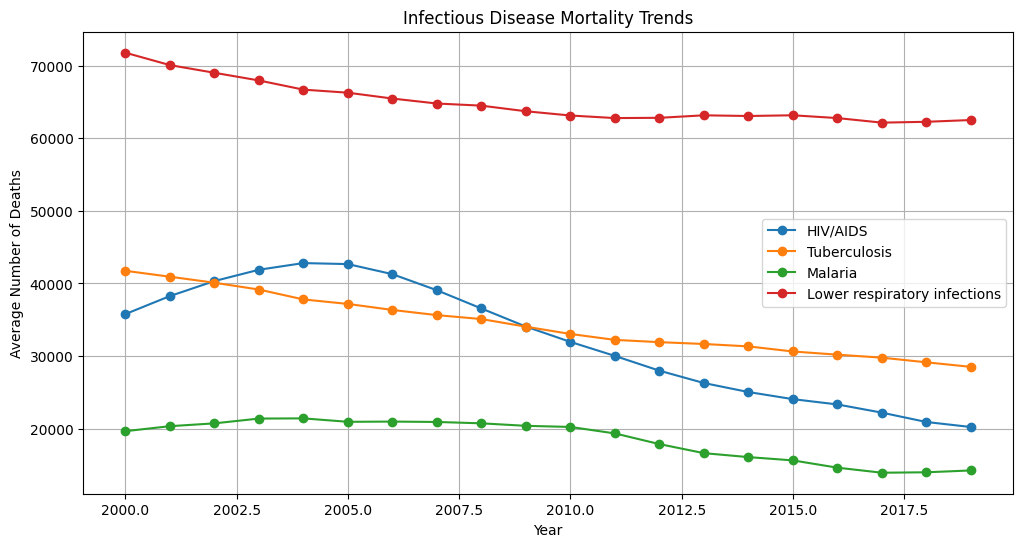

In [55]:
# Visualization 1: Disease Trends
plt.figure(figsize=(12, 6))
for disease in diseases:
    plt.plot(yearly_trends['Year'], yearly_trends[disease], label=disease, marker='o')
plt.title('Infectious Disease Mortality Trends')
plt.xlabel('Year')
plt.ylabel('Average Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()

# Regional Analysis Visualization

This kind of heatmap shows HIV/AIDS mortality by different areas and years, with high death rate regions colored darker red and low death rate regions to be more yellow. The information is arrayed with regions stated on the y- axis that includes Africa, Americas, Asia, Europe, and Oceania with time periods specified on the x-axis that incorporates the 1990s, 2000s, and 210Os with actual death rates being reflected in each column.

Europe has the highest death rates in the first two periods having 62,266 in the 1990’s and 62,549 in the 2000’s but decline massively in the 2010’s to just 36,757. AFRICA presents the same but the figures are slightly below that of AMERICA ; the figures were 50,983 in the 1990s, increased to 56,383 in the 2000s and came down to 35,978 in the 2010s. Asia also has revealed high mortality rates to be 48665 in 1990s, 54461 in 2000s and 34141 in 2010s.

Americas and Oceania have been adopting lower death rates than other regions of the world. The Americas accounted for 19,056 in the 1990 emerging to 22,584 in the 2000 and reducing to 14,824in the 2010 decade. Oceania underneath, stood at 10,435 in the 1990s, to 11,656 in the 2000s and 7,607 in the 2010s. Every region records a significant reduction in HIV/AIDS deaths by the end of the 2010s pointing to enhanced provision of drugs and purification of techniques in virtually all parts of the world.

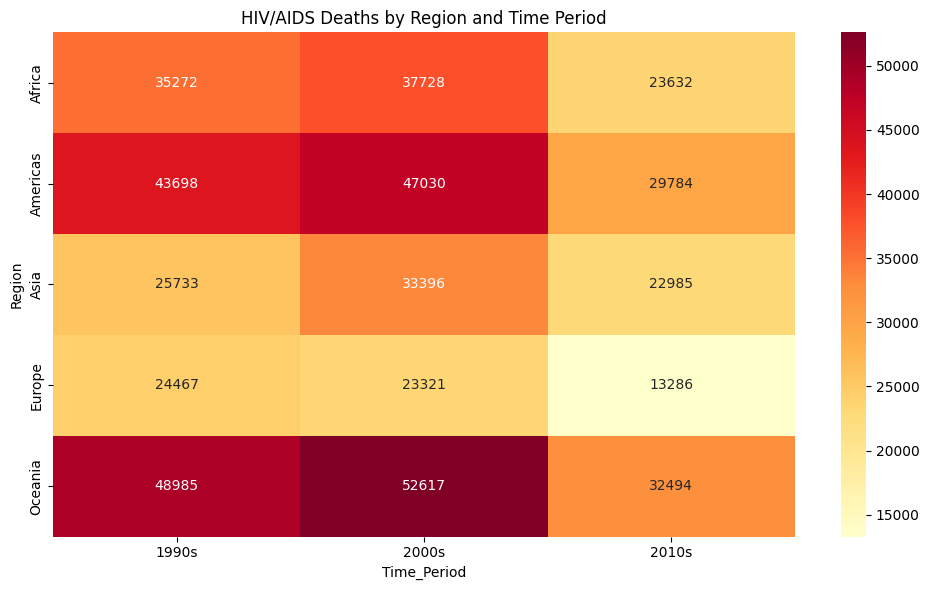

In [56]:
# Visualization 2: Regional Analysis
plt.figure(figsize=(10, 6))
regional_pivot = regional_analysis.pivot(index='Region', columns='Time_Period', values='HIV/AIDS')
sns.heatmap(regional_pivot, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('HIV/AIDS Deaths by Region and Time Period')
plt.tight_layout()
plt.show()

# Population category trends visualization

This line graph shows the disease burden by populations categories : High, Medium, and Low from year 2000 to about 2018. On the horizontal axis we have years, and on the vertical axis the value of the Disease Burden Index ranging from about 25,000 to 55,000.

The most notable aspect of the data is that it shows that Low population category has considerably more disease incidence than the High (orange line) – around half more in fact, as the Low population disease totals start at approximately 55 000 in 2000 and exhibits a clear decreasing trend to around 40 000 in 2018. This has shown a decline rate even steeper than all the other categories this year.

The observed dynamics for the High (blue line) and Medium (green line) population categories are nearly identical and the lines are very close for 1990-2014. It is also important to note that both categories for starting at around 36000 in 2000 and the figure gradually decreases to around 27000 in the year 2018. These two categories of lines are in parallel, meaning that both elements suffered similar circumstances with disease burden; reduction.

If we compare the results of the Reduce, Low and Very Low groups for this particular 18-year period, one can conclude that while health care and diseases control and treatment in general have been improving, the gap between Reduce, Low and Very Low categories has not closed, which implies that medical inequalities persist between the population categories at record level.

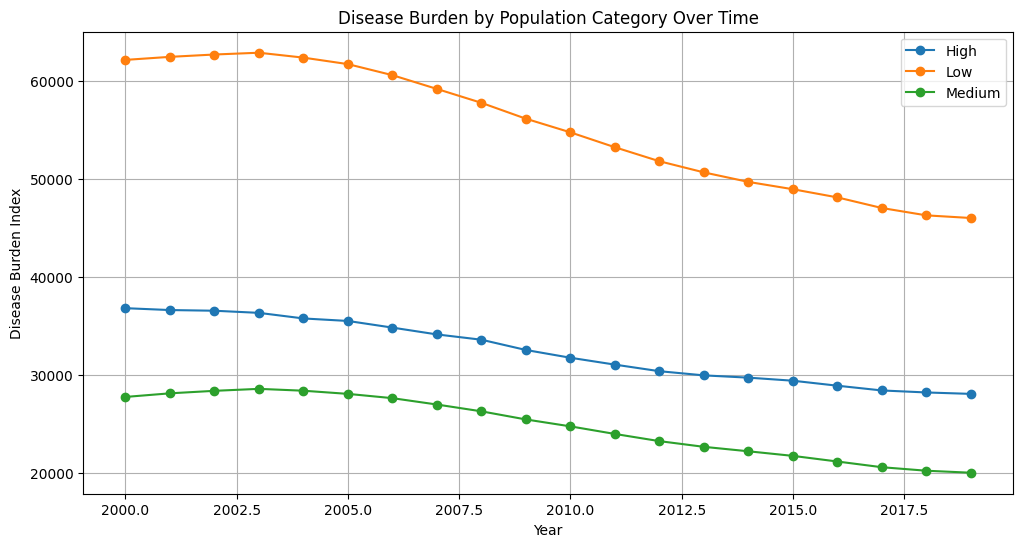

In [57]:
# Visualization 3: Population Category Trends
plt.figure(figsize=(12, 6))
for category in population_analysis['Population_Category'].unique():
    data = population_analysis[population_analysis['Population_Category'] == category]
    plt.plot(data['Year'], data['Disease_Burden_Index'], label=category, marker='o')
plt.title('Disease Burden by Population Category Over Time')
plt.xlabel('Year')
plt.ylabel('Disease Burden Index')
plt.legend()
plt.grid(True)
plt.show()

# Regression Analysis

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [59]:
def clean_dataframe(df):
    """
    Clean the dataframe by handling missing values and duplicates

    Parameters:
    df (pd.DataFrame): Input dataframe

    Returns:
    pd.DataFrame: Cleaned dataframe
    """
    cleaned_df = df.copy()

    # Drop duplicates
    cleaned_df = cleaned_df.drop_duplicates()

    # Handle missing values
    cleaned_df = cleaned_df.dropna()

    # Reset index
    cleaned_df = cleaned_df.reset_index(drop=True)

    return cleaned_df


In [60]:
def prepare_features(df, target_col, feature_cols):
    """
    Prepare features and target variables

    Parameters:
    df (pd.DataFrame): Input dataframe
    target_col (str): Name of target column
    feature_cols (list): List of feature column names

    Returns:
    tuple: X (features) and y (target)
    """
    X = df[feature_cols]
    y = df[target_col]
    return X, y

In [61]:
def scale_features(X_train, X_test):
    """
    Scale features using StandardScaler

    Parameters:
    X_train (pd.DataFrame): Training features
    X_test (pd.DataFrame): Testing features

    Returns:
    tuple: Scaled training and testing features
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [62]:
def calculate_regression_metrics(y_true, y_pred):
    """
    Calculate regression metrics

    Parameters:
    y_true: Actual values
    y_pred: Predicted values

    Returns:
    dict: Dictionary of metrics
    """
    metrics = {
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred)
    }
    return metrics

In [63]:
def train_linear_regression(X_train, y_train):
    """
    Train Linear Regression model

    Parameters:
    X_train: Training features
    y_train: Training target

    Returns:
    model: Trained Linear Regression model
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [64]:
def train_random_forest(X_train, y_train, n_estimators=100):
    """
    Train Random Forest model

    Parameters:
    X_train: Training features
    y_train: Training target
    n_estimators: Number of trees

    Returns:
    model: Trained Random Forest model
    """
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    return model

# Linear Regression and Random Forest


The code compares Linear Regression model with Random Forest model to predict HIV/Aids deaths from other infectious diseases mortality data. The first step involves data cleaning of the available yearly trends and feature engineering of Tuberculosis, Malaria, and Lower respiratory infections and the target variable which is HIV/AIDS deaths.

In the results, researchers observed that there is a vast disparity between the performances of KNN and the NB model. The Linear Regression model suggests fairly good predictive accuracy with R² = 0.5408 and this shows when it provides an account of about 54% variance in HIV/AIDS deaths. Although it has a modest Pearson correlation of 0.992 and a Coefficient of determination of 0.994, clearly, its relatively high Mean Squared Error (MSE) of 22,673,626.8528 and Root Mean Squared Error (RMSE) of 4,761.6832 indicate large errors of prediction with an average absolute error (MAE) of 3,600.7917 deaths.

On the other hand, the Random Forest model produces considerably better performance across all the four studied metrics. It gets a very high value of R² of 0.9841 implying that about 98% of the variation of HIV/AIDS death can be accounted for by the independent variables. Comparing with the Linear Regression model, the MSE (783,311.3796) and RMSE (885.0488) from the developed model are much lower, therefore indicating higher accuracy of the predictions. This shows that the MAE of 783.9573 is much better in terms of prediction accuracy when compared to the previous method. This echoes superior performance, which implies that the interaction of HIV/AIDS death and other infectious diseases cannot be easily described by a straight-line hence why the Random Forest is more appropriate in mapping interaction data in this case.




In [65]:
df_cleaned = clean_dataframe(yearly_trends)

# Define features and target
target_col = 'HIV/AIDS'
feature_cols = ['Tuberculosis', 'Malaria', 'Lower respiratory infections']

# Prepare features
X, y = prepare_features(df_cleaned, target_col, feature_cols)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

# Train models
lr_model = train_linear_regression(X_train_scaled, y_train)
rf_model = train_random_forest(X_train_scaled, y_train)

# Make predictions
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
lr_metrics = calculate_regression_metrics(y_test, lr_pred)
rf_metrics = calculate_regression_metrics(y_test, rf_pred)

# Print results
print("Linear Regression Metrics:")
for metric, value in lr_metrics.items():
  print(f"{metric}: {value:.4f}")

print("\nRandom Forest Metrics:")
for metric, value in rf_metrics.items():
  print(f"{metric}: {value:.4f}")

Linear Regression Metrics:
MSE: 22673626.8528
RMSE: 4761.6832
MAE: 3600.7917
R2: 0.5408

Random Forest Metrics:
MSE: 783311.3796
RMSE: 885.0488
MAE: 783.9573
R2: 0.9841


# Ridge Regression

Ridge regression code from other infectious disease data to predict HIV/AIDS deaths, using different alpha values of 0.1, 1.0 and 10.0. Ridge Regression is designed to reduce high variance by incorporating a certain number of points to the linear regression model.

The analysis revealed that the model with the value of alpha=0.1 is the most effective for analysis, with R²= 0.4926 – which defines that approximately 49% of the changes in HIV/AIDS deaths can be explained by the model. Of the three different alpha values used in this study, this model has the lowest MSE of 25,053,090.4457 and RMSE of 5,005.3062. The corresponding feature coefficients for this best model above indicate that Malaria has stronger relation to and HIV/AIDS deaths than Tuberculosis and lower respiratory infections 3875.2347, 3598.8528 and 493.1609 respectively.

When alpha increases to 1.0 and 10.0, the model’s performance slightly decreases and gets the R² of 0.4154 and 0.4264, respectively. This implies that the considered, perhaps, involves overconstraints as regards the model. The feature coefficients are also affected by an increasing value in alpha, which makes all the features contribute almost more evenly, especially with Lower respiratory infections coefficient rising from 493.1609 to 1649.5962 as the regularization barrier is roused.

The last model based on the alpha value of 0.1 also shows the same performance as it was in the first run proving the consistency of the results. However, it is still slightly lower than the previously presented Random Forest model (R² = 0.9841), which indicates that the presented relationships might fit better into nonlinear models.



In [66]:
def train_ridge_regression(X_train, y_train, alpha=1.0):
    """
    Train Ridge Regression model

    Parameters:
    X_train: Training features
    y_train: Training target
    alpha: Regularization strength (default=1.0)

    Returns:
    model: Trained Ridge Regression model
    """
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    return model

In [67]:
from sklearn.linear_model import Ridge
# Define features and target
target_col = 'HIV/AIDS'
feature_cols = ['Tuberculosis', 'Malaria', 'Lower respiratory infections']

# Prepare features
X, y = prepare_features(df_cleaned, target_col, feature_cols)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
X_train_scaled, X_test_scaled = scale_features(X_train, X_test)

alphas = [0.1, 1.0, 10.0]
results = {}

for alpha in alphas:
        # Train Ridge model with different alpha
        ridge_model = train_ridge_regression(X_train_scaled, y_train, alpha=alpha)

        # Make predictions
        ridge_pred = ridge_model.predict(X_test_scaled)

        # Calculate metrics using our function
        metrics = calculate_regression_metrics(y_test, ridge_pred)
        results[f'Ridge (alpha={alpha})'] = metrics

        # Get feature coefficients
        coefficients = dict(zip(feature_cols, ridge_model.coef_))

        print(f"\nRidge Regression (alpha={alpha}):")
        print("Metrics:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

        print("\nFeature Coefficients:")
        for feature, coef in coefficients.items():
            print(f"{feature}: {coef:.4f}")

    # Find best alpha based on R2 score
best_alpha = max(alphas, key=lambda x: results[f'Ridge (alpha={x})']['R2'])
print(f"\nBest alpha value: {best_alpha}")

    # Create final model with best alpha
final_model = train_ridge_regression(X_train_scaled, y_train, alpha=best_alpha)
final_pred = final_model.predict(X_test_scaled)
final_metrics = calculate_regression_metrics(y_test, final_pred)

print("\nFinal Model (Best Alpha) Metrics:")
for metric, value in final_metrics.items():
  print(f"{metric}: {value:.4f}")


Ridge Regression (alpha=0.1):
Metrics:
MSE: 25053090.4457
RMSE: 5005.3062
MAE: 3869.5302
R2: 0.4926

Feature Coefficients:
Tuberculosis: 3598.8528
Malaria: 3875.2347
Lower respiratory infections: 493.1609

Ridge Regression (alpha=1.0):
Metrics:
MSE: 28864989.5969
RMSE: 5372.6148
MAE: 4162.4934
R2: 0.4154

Feature Coefficients:
Tuberculosis: 2710.7658
Malaria: 3910.5725
Lower respiratory infections: 1239.0709

Ridge Regression (alpha=10.0):
Metrics:
MSE: 28318911.0244
RMSE: 5321.5516
MAE: 4412.9648
R2: 0.4264

Feature Coefficients:
Tuberculosis: 2219.3765
Malaria: 2644.8771
Lower respiratory infections: 1649.5962

Best alpha value: 0.1

Final Model (Best Alpha) Metrics:
MSE: 25053090.4457
RMSE: 5005.3062
MAE: 3869.5302
R2: 0.4926


# Conclusion

There are several generalizable conclusions drawn from the analysis in this study based on several classes of scientific methods affected by infectious disease mortality. The temporal analysis of the countries from 2000 to 2018 indicate that there has been a progressive decrease in the mortality rate of all the diseases under study (HIV/AIDS, Tuberculosis, Malaria, and Lower respiratory infections) while Lower respiratory infections, though declining have been recording the highest mortality rate.
The breakdown of mortality by region revealed large differences across space with high HIV/AIDS mortality rates featured for Africa and Europe although marked trends have improved over time. The number of deaths in Africa has risen in the early 2000’s and reached its highest level in 2000s, 56,383 and then plunged in the 2010s to 35,978. The national level, region and population category analysis also showed a similar trend of increased burden rates in low population settings compared to medium and high population settings but there was improvement over the year.
As for the predictive model, Random forest performed much better than both Linear regression as well as Ridge regression; R2=0.9841 for Random forest, R2=0.5408 for Linear and R2=0.4926 for the Ridge regression at best alpha of 0.1. This leads to the conclusion that the internal structure and relational matrix between diverse infectious diseases is not just non-linear, but also multifaceted and versatile. This overseas could mean that Random Forest is a better at capturing those complex interactions that exist between various diseases.